In [ ]:

import kagglehub
nhattruongdev_musan_noise_path = kagglehub.dataset_download('nhattruongdev/musan-noise')

print('Data source import complete.')


100%|██████████| 10.3G/10.3G [01:46<00:00, 104MB/s]

Extracting files...


Data source import complete.


In [ ]:
print("Dataset path:", nhattruongdev_musan_noise_path)


Dataset path: /root/.cache/kagglehub/datasets/nhattruongdev/musan-noise/versions/1


In [ ]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: /content


In [ ]:
import shutil
import os

# Source path: Where the dataset is downloaded
source_path = "/root/.cache/kagglehub/datasets/nhattruongdev/musan-noise/versions/1"

# Destination path: Notebook's working directory
destination_path = os.path.join(os.getcwd(), 'musan_noise_data')

# Ensure the destination directory exists
os.makedirs(destination_path, exist_ok=True)

# Copy the dataset
shutil.copytree(source_path, destination_path, dirs_exist_ok=True)

print(f"Dataset copied successfully to {destination_path}")

Dataset copied successfully to /content/musan_noise_data


In [ ]:
#import urban sound 8k
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rupakroy/urban-sound-8k")
print('Data source import complete.')



100%|██████████| 5.61G/5.61G [01:38<00:00, 61.4MB/s]

Extracting files...


Data source import complete.


In [ ]:
#copy the urban sound 8k dataset to current working directory
import shutil
import os

# Source path: Where the dataset is downloaded

src = "/root/.cache/kagglehub/datasets/rupakroy/urban-sound-8k/versions/1"

# Destination path: Notebook's working directory
dst = os.path.join(os.getcwd(), 'urban_sound_data')

# Ensure the destination directory exists
os.makedirs(dst, exist_ok=True)

# Copy the dataset
shutil.copytree(src, dst, dirs_exist_ok=True)

print(f"Dataset copied successfully to {dst}")

Dataset copied successfully to /content/urban_sound_data


In [ ]:
# List files in the destination directory
for root, dirs, files in os.walk(destination_path):
    print("Root:", root)
    print("Directories:", dirs)
    print("Files:", files[:10])  # Print first 10 files
    print("\n")


Root: /content/musan_noise_data
Directories: ['musan']
Files: []


Root: /content/musan_noise_data/musan
Directories: ['music', 'noise', 'speech']
Files: ['README']


Root: /content/musan_noise_data/musan/music
Directories: ['fma-western-art', 'hd-classical', 'fma', 'jamendo', 'rfm']
Files: ['README']


Root: /content/musan_noise_data/musan/music/fma-western-art
Directories: []
Files: ['music-fma-wa-0022.wav', 'music-fma-wa-0075.wav', 'music-fma-wa-0062.wav', 'music-fma-wa-0034.wav', 'music-fma-wa-0026.wav', 'music-fma-wa-0045.wav', 'music-fma-wa-0059.wav', 'LICENSE', 'music-fma-wa-0040.wav', 'music-fma-wa-0005.wav']


Root: /content/musan_noise_data/musan/music/hd-classical
Directories: []
Files: ['music-hd-0039.wav', 'music-hd-0012.wav', 'music-hd-0053.wav', 'music-hd-0002.wav', 'music-hd-0021.wav', 'music-hd-0060.wav', 'music-hd-0008.wav', 'music-hd-0074.wav', 'music-hd-0047.wav', 'LICENSE']


Root: /content/musan_noise_data/musan/music/fma
Directories: []
Files: ['music-fma-0012.wa

In [ ]:
import os
import shutil

def flatten_directory(parent_dir):
    # Iterate through each class folder (music, speech, noise)
    for subdir in os.listdir(parent_dir):
        class_dir = os.path.join(parent_dir, subdir)
        if os.path.isdir(class_dir):
            # Iterate through subdirectories
            for root, _, files in os.walk(class_dir):
                for file in files:
                    if file.endswith('.wav'):
                        # Move .wav files to the main class directory
                        source = os.path.join(root, file)
                        destination = os.path.join(class_dir, file)
                        if not os.path.exists(destination):  # Avoid overwriting files
                            shutil.move(source, destination)

            # Remove empty subdirectories after moving files
            for root, dirs, _ in os.walk(class_dir, topdown=False):
                for dir_name in dirs:
                    dir_path = os.path.join(root, dir_name)
                    if not os.listdir(dir_path):  # Check if directory is empty
                        os.rmdir(dir_path)

# Set the parent directory where 'music', 'speech', and 'noise' folders are located
parent_directory = "/content/musan_noise_data/musan"
flatten_directory(parent_directory)

print("Directories have been flattened successfully!")


Directories have been flattened successfully!


In [ ]:
import os
import shutil

# Source folders
source_folders = [
    "urban_sound_data/UrbanSound8K/UrbanSound8K/audio/fold1",
    "urban_sound_data/UrbanSound8K/UrbanSound8K/audio/fold2",
    "urban_sound_data/UrbanSound8K/UrbanSound8K/audio/fold3",
    "urban_sound_data/UrbanSound8K/UrbanSound8K/audio/fold4",
    "urban_sound_data/UrbanSound8K/UrbanSound8K/audio/fold5",
    "urban_sound_data/UrbanSound8K/UrbanSound8K/audio/fold6",
    "urban_sound_data/UrbanSound8K/UrbanSound8K/audio/fold7",
    "urban_sound_data/UrbanSound8K/UrbanSound8K/audio/fold8",
    "urban_sound_data/UrbanSound8K/UrbanSound8K/audio/fold9"
]

# Destination folder
destination_folder = "musan_noise_data/musan/noise"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate through source folders and copy .wav files
for folder in source_folders:
    for filename in os.listdir(folder):
        if filename.endswith(".wav"):
            source_path = os.path.join(folder, filename)
            destination_path = os.path.join(destination_folder, filename)
            shutil.copy(source_path, destination_path)

print("Files copied successfully!")

Files copied successfully!


In [ ]:
#print total number of files in each of music, noise and speech folder



def count_wav_files_in_folders(parent_directory):
    for subdir in ['music', 'noise', 'speech']:
        folder_path = os.path.join(parent_directory, subdir)
        wav_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.wav')]
        num_wav_files = len(wav_files)
        print(f"Number of .wav files in {subdir}: {num_wav_files}")

# Set the parent directory where 'music', 'speech', and 'noise' folders are located
parent_directory = "/content/musan_noise_data/musan"
count_wav_files_in_folders(parent_directory)


Number of .wav files in music: 660
Number of .wav files in noise: 8825
Number of .wav files in speech: 426


In [ ]:
#remove/urban_sound_8k
import shutil
import os

# Source path: Where the dataset is downloaded
src = "/root/.cache/kagglehub/datasets/rupakroy/urban-sound-8k/versions/1"

# Destination path: Notebook's working directory
dst = os.path.join(os.getcwd(), 'urban_sound_data')

# Ensure the destination directory exists
os.makedirs(dst, exist_ok=True)

# Remove the urban_sound_data directory
shutil.rmtree(dst)

print(f"Directory '{dst}' and its contents removed successfully.")

Directory '/content/urban_sound_data' and its contents removed successfully.


Audio preprossing with low pass filter

In [ ]:
import librosa
import numpy as np
from scipy.signal import butter, lfilter

# Define the low-pass filter function
def butter_lowpass(lowcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    b, a = butter(order, low, btype='lowpass', analog=False)
    return b, a

# Function to load and apply the low-pass filter to the audio
def load_and_filter_audio(audio_file, fs=22050, lowcut=300.0):
    # Load audio file
    y, sr = librosa.load(audio_file, sr=fs)

    # Apply low-pass filter
    b, a = butter_lowpass(lowcut, fs)
    filtered_audio = lfilter(b, a, y)

    return filtered_audio, sr

# Function to normalize the audio length to 20 seconds
def normalize_audio_length(y, sr, target_length=20):
    target_samples = target_length * sr
    if len(y) > target_samples:
        # Truncate audio if it's longer than the target length
        y = y[:target_samples]
    elif len(y) < target_samples:
        # Pad audio if it's shorter than the target length
        y = np.pad(y, (0, target_samples - len(y)), mode='constant')

    return y


Extacting MFCCS

In [ ]:
import librosa
import numpy as np
from scipy.signal import butter, lfilter

def butter_filter(audio_data, filter_type, cutoff_freq, sr, order=5):
    """Applies a Butterworth filter (low-pass, high-pass, or band-pass) to the audio data."""
    nyquist = 0.5 * sr
    if filter_type == 'low_pass':
        b, a = butter(order, cutoff_freq / nyquist, btype='low')
    elif filter_type == 'high_pass':
        b, a = butter(order, cutoff_freq / nyquist, btype='high')
    elif filter_type == 'band_pass':
        low, high = cutoff_freq
        b, a = butter(order, [low / nyquist, high / nyquist], btype='band')
    elif filter_type == 'None':
        b, a = [1], [1]
    else:
        raise ValueError(f"Invalid filter type: {filter_type}. Use 'low_pass', 'high_pass', or 'band_pass'.")
    return lfilter(b, a, audio_data)

def extract_mfcc(audio_data, num_mfcc=13, sr=22050, n_fft=1024, hop_length=512,
                 filter_type=None, cutoff_freq=None):
    """Extract MFCC features from audio data with optional filtering."""
    # Apply filtering if specified
    if filter_type and cutoff_freq:
        audio_data = butter_filter(audio_data, filter_type, cutoff_freq, sr)

    # Check if audio signal is too short and adjust parameters if necessary
    if len(audio_data) < n_fft:
        n_fft = len(audio_data)  # Reduce FFT size if audio is too short

    # Extract MFCCs with adjusted n_fft and hop_length parameters
    mfcc = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)

    # Take the mean of the MFCCs across time (columns) for each coefficient
    mfcc = np.mean(mfcc, axis=1)

    return mfcc


In [ ]:
"""
import librosa
import numpy as np
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_lowpass(cutoff, fs, order=5):
    """Creates a lowpass Butterworth filter."""
    nyquist = 0.5 * fs
    low = cutoff / nyquist
    b, a = butter(order, low, btype='low')
    return b, a

def butter_highpass(cutoff, fs, order=5):
    """Creates a highpass Butterworth filter."""
    nyquist = 0.5 * fs
    high = cutoff / nyquist
    b, a = butter(order, high, btype='high')
    return b, a

def filter_audio(audio_data, sr, filter_type, cutoff_freq, order=5):
    """Applies specified filters to the audio data"""
    if filter_type == 'low_pass':
        b, a = butter_lowpass(cutoff_freq, sr, order)
        filtered_audio = filtfilt(b, a, audio_data)
    elif filter_type == 'high_pass':
        b, a = butter_highpass(cutoff_freq, sr, order)
        filtered_audio = filtfilt(b, a, audio_data)
    elif filter_type == 'band_pass':
        b, a = butter_bandpass(cutoff_freq[0], cutoff_freq[1], sr, order)
        filtered_audio = filtfilt(b, a, audio_data)
    else:
        return audio_data  # If invalid filter type, return original audio data
    return filtered_audio """


Organize dataset for training

In [ ]:
import os
import numpy as np
import librosa
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

# Function to segment audio into smaller chunks
def segment_audio(audio_file, segment_length=5, overlap=0.1, sr=22050):
    """Segment audio file into smaller chunks."""
    try:
        duration = librosa.get_duration(path=audio_file)
        if duration <= segment_length:
            y, sr = librosa.load(audio_file, sr=sr)
            return [y]  # Return the entire file as a single segment

        y, sr = librosa.load(audio_file, sr=sr)
        segment_samples = int(segment_length * sr)
        step_size = int(segment_samples * (1 - overlap))
        return [y[start:start + segment_samples] for start in range(0, len(y) - segment_samples, step_size)]
    except Exception as e:
        print(f"Error segmenting file {audio_file}: {e}")
        return []

def process_audio_file(args):
    """Helper function to process a single audio file."""
    audio_file, label = args
    features, labels = [], []
    label_map = {'music': 0, 'speech': 1, 'noise': 2}

    try:
        segments = segment_audio(audio_file, segment_length=3, overlap=0.5)
        for segment in segments:
            if label in label_map:
                mfcc = extract_mfcc(segment, filter_type='None', cutoff_freq=[300, 3400] if label in ['music', 'speech'] else 300)
                features.append(mfcc)
                labels.append(label_map[label])
            else:
                print(f"Unknown label {label} for file {audio_file}")
    except Exception as e:
        print(f"Error processing file {audio_file}: {e}")
    return features, labels

def prepare_data(dataset_path, num_processes=cpu_count()):
    """Prepare dataset with multiprocessing."""
    all_files = [
        (os.path.join(dataset_path, label, file), label)
        for label in os.listdir(dataset_path)
        if os.path.isdir(os.path.join(dataset_path, label))
        for file in os.listdir(os.path.join(dataset_path, label))
        if file.endswith('.wav')
    ]

    with Pool(processes=num_processes) as pool:
        results = list(tqdm(pool.imap(process_audio_file, all_files),
                             total=len(all_files), desc="Processing Audio Files", unit="file"))

    features = [feature for result in results for feature in result[0]]
    labels = [label for result in results for label in result[1]]

    X = np.array(features, dtype=object)  # Handle variable-length features
    y = np.array(labels)

    np.save('X_features.npy', X)
    np.save('y_labels.npy', y)

    print("Data preparation complete and saved!")
    return X, y


dataset_path = "/content/musan_noise_data/musan"  # Your dataset path
X, y = prepare_data(dataset_path)
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Complete!")


Processing Audio Files:   0%|          | 0/9911 [00:03<?, ?file/s]Process ForkPoolWorker-7:



KeyboardInterrupt: 

In [ ]:
# Save the features to Google Drive
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load features
x = np.load('/content/X_features.npy', allow_pickle=True)  # Allow pickle for object arrays
y = np.load('/content/y_labels.npy', allow_pickle=True)

print(x.shape)
print(y.shape)


print("Complete!")

Mounted at /content/drive
(267372, 13)
(267372,)
Complete!


In [ ]:
#load features from drive
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
x=np.load('/content/drive/MyDrive/X_features.npy')
y=np.load('/content/drive/MyDrive/y_labels.npy')
print(x.shape)
print(y.shape)
print("Complete!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(259322, 13)
(259322,)
Complete!


In [68]:
# Libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Fixed: Added space after preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
#Load Data
# 2. Load Data
X = np.load('X_features.npy', allow_pickle=True)
y = np.load('y_labels.npy', allow_pickle=True)

print(X.shape)
print(y.shape)

print("Data Loaded succesfully");

(267372, 13)
(267372,)
Data Loaded succesfully


In [70]:
# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Splitted succesfully")

Data Splitted succesfully


In [71]:
# 4. Pad Sequences
max_length = max(len(x) for x in X_train)
X_train = np.array([np.pad(x, (0, max_length - len(x)), 'constant') for x in X_train])
X_test = np.array([np.pad(x, (0, max_length - len(x)), 'constant') for x in X_test])

print("Sequences Padded succesfully")

Sequences Padded succesfully


In [72]:
# 5. Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Data Reshaped succesfully")

Data Reshaped succesfully


In [73]:
# 6. Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

print("Features Scaled succesfully")

Features Scaled succesfully


In [74]:
# 7. Build LSTM Model
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

print("Model Built succesfully")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Built succesfully


In [75]:
# 8. Compile Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Model Compiled succesfully")

Model Compiled succesfully


In [76]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 13, 256)             │         133,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 13, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 297,859 (1.14 MB)

 Trainable params: 297,859 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# 9. Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("Early Stopping defined succesfully")

Early Stopping defined succesfully


In [79]:
# 10. Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/10
5348/5348 ━━━━━━━━━━━━━━━━━━━━ 492s 92ms/step - accuracy: 0.9276 - loss: 0.2033 - val_accuracy: 0.9428 - val_loss: 0.1656
Epoch 2/10
5348/5348 ━━━━━━━━━━━━━━━━━━━━ 434s 79ms/step - accuracy: 0.9480 - loss: 0.1491 - val_accuracy: 0.9475 - val_loss: 0.1486
Epoch 3/10
5348/5348 ━━━━━━━━━━━━━━━━━━━━ 436s 78ms/step - accuracy: 0.9564 - loss: 0.1280 - val_accuracy: 0.9614 - val_loss: 0.1123
Epoch 4/10
5348/5348 ━━━━━━━━━━━━━━━━━━━━ 418s 78ms/step - accuracy: 0.9600 - loss: 0.1140 - val_accuracy: 0.9652 - val_loss: 0.1007
Epoch 5/10
5348/5348 ━━━━━━━━━━━━━━━━━━━━ 466s 83ms/step - accuracy: 0.9652 - loss: 0.1009 - val_accuracy: 0.9654 - val_loss: 0.1012
Epoch 6/10
5348/5348 ━━━━━━━━━━━━━━━━━━━━ 445s 83ms/step - accuracy: 0.9671 - loss: 0.0947 - val_accuracy: 0.9703 - val_loss: 0.0867
Epoch 7/10
5348/5348 ━━━━━━━━━━━━━━━━━━━━ 460s 86ms/step - accuracy: 0.9695 - loss: 0.0876 - val_accuracy: 0.9691 - val_loss: 0.0896
Epoch 8/10
5348/5348 ━━━━━━━━━━━━━━━━━━━━ 504s 86ms/step - accuracy: 

Test Accuracy: 0.9736886620521545


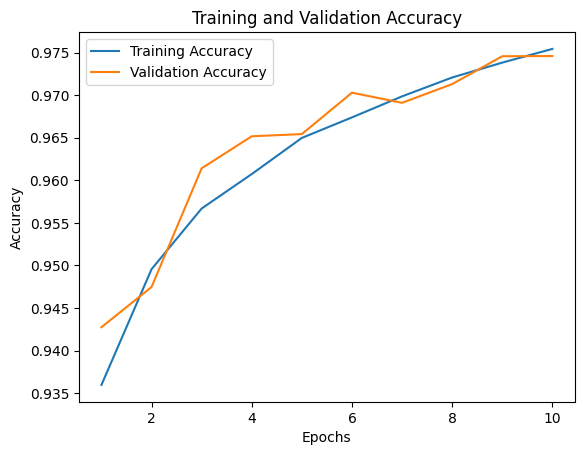

In [81]:
#display the test and val accuracy along with graph
import matplotlib.pyplot as plt

# Evaluate the model on the test set
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the test accuracy
print('Test Accuracy:', test_accuracy)

# Get training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy curves
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1672/1672 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step


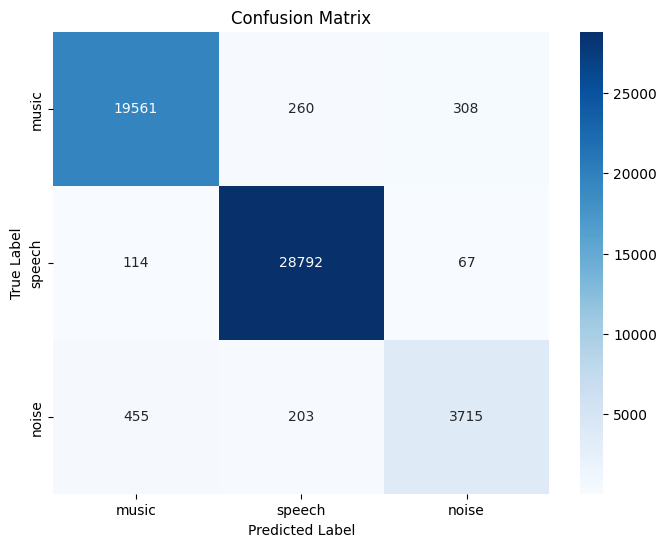

In [82]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['music', 'speech', 'noise'],
            yticklabels=['music', 'speech', 'noise'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [84]:
#print the classification report
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=['Music', 'Speech', 'Noise']))

              precision    recall  f1-score   support

       Music       0.97      0.97      0.97     20129
      Speech       0.98      0.99      0.99     28973
       Noise       0.91      0.85      0.88      4373

    accuracy                           0.97     53475
   macro avg       0.95      0.94      0.95     53475
weighted avg       0.97      0.97      0.97     53475



Splitting Data and Training the Model

In [85]:
from google.colab import files

# Save the model in .h5 format (if needed) or in .keras format
model.save('bestest_model.keras')

# Download the model to your local machine
files.download('bestest_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>